<a href="https://colab.research.google.com/github/Mv0sKff/MyDeepLearning/blob/main/week_4/Assignment_CIFAR10_MLP_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 with a MLP in PyTorch
We return to our problem form last week and try to optimize our solution:
* use TensorBoard to visualize the training
* try different Losses
* try different Optimizers
* try different hyper-parameters

In [28]:
!pip install torch torchvision

In [29]:
#imports
import torch
import torchvision
import torchvision.transforms as transforms

## Get CIFAR
Use PyTorch Data Loaders (more next week) to get data batches

In [30]:
#transform input data (image) to tensor
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     #transforms.Lambda(lambda x: x.view(-1)) # flatten
])

#set batch size
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

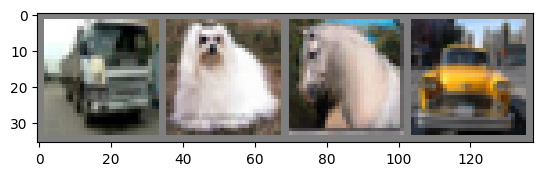

truck dog   horse car  


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter) #get data from loader!

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Assignment: design MLP to classify CIFAR10

### E1 use TensorBoard to visualize the training

### E2 try two different Losses

### E3 try two different Optimizers
* SGD with Momentum
* AdaGrad or Adam

### E4 implement a learning rate schedule
* use SGD with Momentung as Optimizer
* use a Multi-step schedule

### Notes:
* USE THE GPU! -> need to transfer the model and data to the GPU
* MLP take 1D input - CIFAR imges are 2D -> first operator of your net needs to flatten the image
* CIFAR is a multi class problem: use a SOFTMAX layer to output vector of class propabilities -> user argmax to get the class lable
* Start small: use a small net with a reducet training set and a few epochs to test your setup

In [32]:
import torch.nn as nn

In [33]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super().__init__()
        layers = [
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[1], output_size)
        ]
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

model = MLP(3072, [512, 256], 1)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [34]:
input_size = 3072
hidden_sizes = [512, 256]
output_size = 1

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"device: {device}")

#model = MLP(input_size, hidden_sizes, output_size).to(device)
model = MLP(3072, [512, 256], 1).to(device)
print(model)

device: cuda
MLP(
  (model): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
  )
)


In [36]:
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 2
for epoch in range(epochs):
    total_loss = 0
    for images, labels in trainloader:
        images = images.view(images.size(0), -1).to(device)
        labels = labels.view(-1, 1).float().to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        print(loss)

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")


tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogi

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2f2cd76840>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process

tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogi


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2f2cd76840>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2f2cd76840>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1

tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)



  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e2f2cd76840>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process


tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(nan, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogi

KeyboardInterrupt: 